In [348]:
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [349]:
import warnings
warnings.filterwarnings('ignore')

In [350]:
data = h5py.File('data/Q1/MNIST_Subset.h5','r+')
X=data['X'][:]
Y=data['Y'][:]

In [351]:
X.shape,Y.shape

((14251, 28, 28), (14251,))

In [352]:
X = X.reshape(X.shape[0],-1)

In [353]:
X=X/255

In [354]:
np.unique(Y)

array([7, 9], dtype=uint8)

In [355]:
#as we only have 2 classes
Y = np.where(Y==7,0,1)

In [356]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [357]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((11400, 784), (2851, 784), (11400,), (2851,))

In [321]:
def one_hot_encoding(Y):
    n_classes = len(np.unique(Y))
    Y=Y.reshape(1,Y.shape[0])
    Y_new = np.eye(n_classes)[Y.astype('int32')]
    Y_new = Y_new.T.reshape(n_classes, Y.shape[1])
    return Y_new,n_classes

In [322]:
Y_train,n_classes = one_hot_encoding(Y_train)
Y_test,n_classes=one_hot_encoding(Y_test)

In [323]:
Y_train.shape,Y_test.shape

((2, 11400), (2, 2851))

In [324]:
X_train=X_train.T
X_test=X_test.T

In [325]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((784, 11400), (784, 2851), (2, 11400), (2, 2851))

In [16]:
def relu(z,derative = False):
    if derative:
        z[z<=0]=0
        z[z>0]=1
        return z
    z[z<0]=0
    return z

In [17]:
def sigmoid(z,derative = False):
    if derative:
        print("===================input to sigmoid derv====================")
        print(z)
        print("================output of sig derv=============")
        temp = sigmoid(z)*(1-sigmoid(z))
        print(temp)
#         return z*(1-z)
        return temp
    return 1.0/(1.0+np.exp(-z))

In [18]:
def softmax(z):
    z=z-np.max(z,axis=0)
    return np.exp(z)/np.sum(np.exp(z),axis=0)

In [19]:
def compute_multiclass_loss(Y, Y_hat):
    print("&&&&&&&&&&&&&INSIDe cost function%%%%%%%%%%")
    print("===========true labels===================")
    print(Y)
    print("===========predic labels===================")
    print(Y_hat)
    print("========fixing predicted loss=========")
    Y_hat[Y_hat==0.] = 0.0001
    Y_hat[Y_hat==1.] = 0.9999
    print(Y_hat)
    print("============log of lablesl=============")
    print(np.log(Y_hat))
    print("=================multiple=============")
    print(np.multiply(Y, np.log(Y_hat)))
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    return -(1/m) * L_sum

In [20]:
def get_class_values(results):
    return results.argmax(axis=0)

In [21]:
def init_weights(n_hidden_layers, number_of_neurons):
    weights_layers =[np.random.uniform(size=(number_of_neurons[0],X_train.shape[0]))]
    bias_layers = [np.random.uniform(size=(number_of_neurons[0],1))]
    
    for i in range(1,n_hidden_layers):
        weights_layers.append(np.random.uniform(size=(number_of_neurons[i],weights_layers[i-1].shape[0])))
        bias_layers.append(np.random.uniform(size=(number_of_neurons[i],1)))
    
    weights_layers.append(np.random.uniform(size=(n_classes,weights_layers[-1].shape[0])))
    bias_layers.append(np.random.uniform(size=(n_classes,1)))
    
    return weights_layers,bias_layers

In [38]:
def train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation):
    global weight_layers
    global bias_layers
    
    cost=[]
    number_of_samples = X_train.shape[1]
    accuracy_train = []
    accuracy_test = []
    
    #------epoch start here----------
    while epoch>0:
        print("################EPOCH start here ############")
        input_layers = [X_train]
        output_layers=[X_train]

        delta_weights = []
        delta_bias = []
        


        for weight,bias in zip(weight_layers[:-1],bias_layers[:-1]):
            print("%%%%%%%%%%%%%Hidden layer%%%%%%%%%%%%%%")
            print("=========A in W.A+B=============")
            print(output_layers[-1])
            print("=========W in W.A+B=============")
            print(weight)
            print("=========B in W.A+B=============")
            print(bias)
            input_layers.append(np.dot(weight,output_layers[-1])+bias)
            print('==============input to the layer==============')
            print(input_layers[-1])
            output_layers.append(hidden_layer_activation(input_layers[-1]))
            print("============output after activation===========")
            print(output_layers[-1])

        print('%%%%%%%%%%%%%%%%output layer%%%%%%%%%%%%%')
        print("=========A in W.A+B=============")
        print(output_layers[-1])
        print("=========W in W.A+B=============")
        print(weight_layers[-1])
        print("=========B in W.A+B=============")
        print(bias_layers[-1])
        input_layers.append(np.dot(weight_layers[-1],output_layers[-1])+bias_layers[-1])
        print('==============input to the layer==============')
        print(input_layers[-1])
        output_layers.append(softmax(input_layers[-1]))
        print("============output after activation===========")
        print(output_layers[-1])
        
        
        c=compute_multiclass_loss(Y_train,output_layers[-1])
        print(f"cost = {c}")
        if np.isnan(c):
            print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
        cost.append(c)
        

        #------Output layer error --------
        error = output_layers[-1] - Y_train
        print("================output layer error==========")
        print(error)
        
        
        delta_weights.append((1./number_of_samples)*np.dot(error,output_layers[-2].T))
        print("=====delta weight output layer============")
        print(delta_weights[0])
        
        delta_bias.append((1./number_of_samples)*np.sum(error, axis=1, keepdims=True))
        print("=====delta bias output layer============")
        print(delta_bias[0])
        
        #-----hidden layer stuff

        for i in range(len(input_layers)-1)[:0:-1]:
            error = np.dot(weight_layers[i].T,error)
            print("==============error this layer========")
            print(error)
            delta_z = error*hidden_layer_activation(input_layers[i],derative=True)
            print("==========input layer derv==========")
            print(hidden_layer_activation(input_layers[i],derative=True))
            print("=======delta z===========")
            print(delta_z)
            delta_weights.insert(0,(1./number_of_samples)*np.dot(delta_z,output_layers[i-1].T))
            print("=====delta weight layer============")
            print(delta_weights[0])
            delta_bias.insert(0,(1./number_of_samples)*np.sum(error,axis=1,keepdims=True))
            print("=====delta bias layer============")
            print(delta_bias[0])

        for i in range(len(weight_layers)):
#             delta_weights[i][np.isnan(delta_weights[i])] = 0.0
            weight_layers[i]=weight_layers[i]-learning_rate*delta_weights[i]
            bias_layers[i]=bias_layers[i]-learning_rate*delta_bias[i]
        
        accuracy_train.append(get_performance(X_train,Y_train,verbose=False)[0])
        accuracy_test.append(get_performance(X_test,Y_test,verbose=False)[0])
        
        if np.isnan(c):
            assert(False)
        epoch-=1

    return cost,accuracy_train,accuracy_test

In [39]:
def predict(X_test,hidden_layer_activation):
    global weight_layers
    global bias_layers
    

    input_layers = [X_test]
    output_layers=[X_test]

    for weight,bias in zip(weight_layers[:-1],bias_layers[:-1]):
        input_layers.append(np.dot(weight,output_layers[-1])+bias)
        output_layers.append(hidden_layer_activation(input_layers[-1]))

    input_layers.append(np.dot(weight_layers[-1],output_layers[-1])+bias_layers[-1])
    output_layers.append(softmax(input_layers[-1]))
    return get_class_values(output_layers[-1])

In [40]:
def get_performance(x,y,verbose = True):
    results = predict(x,hidden_layer_activation=hidden_layer_activation)
    y=get_class_values(y)
    acc = accuracy_score(y,results)
    cnf = confusion_matrix(y,results)
    if verbose:
        print(f"Accuracy score = {acc}")
        print(cnf)
        df_cm = pd.DataFrame(cnf, index = range(2),columns = range(2))
        sn.heatmap(df_cm, annot=True)
    return acc,cnf

## Part 1 (i)(a)

### i) 1 hidden layer

In [140]:
#hyperparameters
epoch = 10
learning_rate = 0.01

In [141]:
%%capture
weight_layers,bias_layers = init_weights(1,[100])
hidden_layer_activation = sigmoid
cost,acc_train,acc_test = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=hidden_layer_activation)
# cost = train_neural_network(X_train,Y_train,epoch,learning_rate)

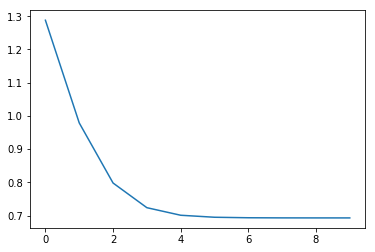

In [142]:
plt.plot(range(len(cost)),cost)

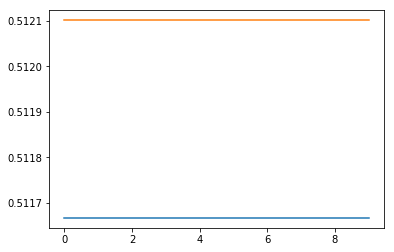

In [143]:
plt.plot(range(len(acc_train)),acc_train)
plt.plot(range(len(acc_test)),acc_test)

Accuracy score = 0.512101017186952
[[1460    0]
 [1391    0]]


(0.512101017186952, array([[1460,    0],
        [1391,    0]]))

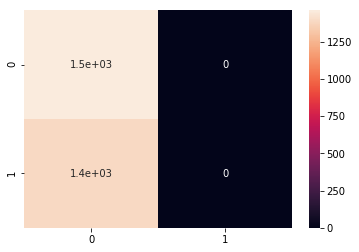

In [144]:
get_performance(X_test,Y_test)

Accuracy score = 0.5116666666666667
[[5833    0]
 [5567    0]]


(0.5116666666666667, array([[5833,    0],
        [5567,    0]]))

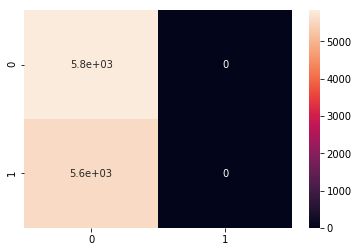

In [145]:
get_performance(X_train,Y_train)

### ii) 3 hidden layers

In [152]:
#hyperparameters
epoch = 10
learning_rate = 0.01

In [154]:
%%capture
weight_layers,bias_layers = init_weights(3,[100,50,50])
hidden_layer_activation = sigmoid
cost,acc_train,acc_test = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=hidden_layer_activation)
# cost = train_neural_network(X_train,Y_train,epoch,learning_rate)

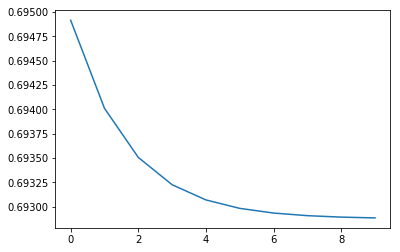

In [155]:
plt.plot(range(len(cost)),cost)

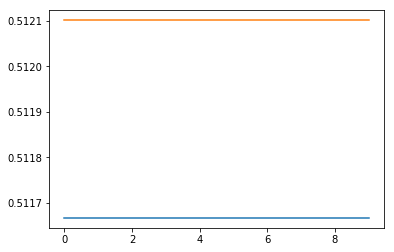

In [156]:
plt.plot(range(len(acc_train)),acc_train)
plt.plot(range(len(acc_test)),acc_test)

Accuracy score = 0.512101017186952
[[1460    0]
 [1391    0]]


(0.512101017186952, array([[1460,    0],
        [1391,    0]]))

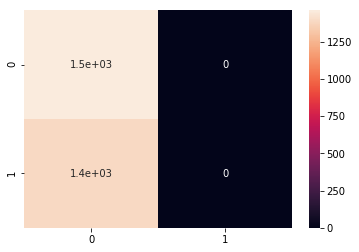

In [157]:
get_performance(X_test,Y_test)

Accuracy score = 0.5116666666666667
[[5833    0]
 [5567    0]]


(0.5116666666666667, array([[5833,    0],
        [5567,    0]]))

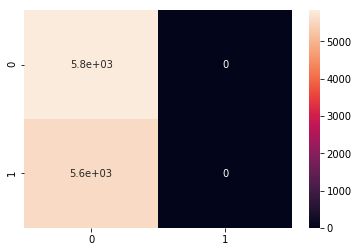

In [151]:
get_performance(X_train,Y_train)

## Part 1 (i)(b)

In current state model is underfiting (as both traning and test accuracy are very low). I think this is happening becuse we are using softmax in last layer. As in the given dataset we only have 2 classes the inital crossentropy loss is so low that the changes in weight are very small and hence barely any learning is taking place. This problem kinda solves if we use a bigger subset of MNIST with multiple classes or 1 neuron with sigmoid in final layer. 

## Part 1 (i)(c)

### i) 1 hidden layer

In [233]:
#hyperparameters
epoch = 10
learning_rate = 0.0001

In [234]:
%%capture
weight_layers,bias_layers = init_weights(1,[100])
hidden_layer_activation = relu
cost,acc_train,acc_test = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=hidden_layer_activation)

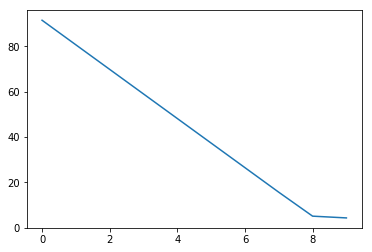

In [235]:
plt.plot(range(len(cost)),cost)

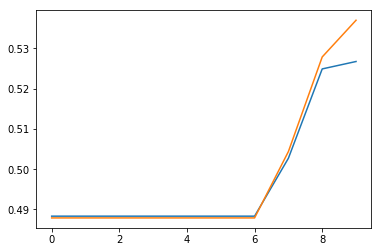

In [236]:
plt.plot(range(len(acc_train)),acc_train)
plt.plot(range(len(acc_test)),acc_test)

Accuracy score = 0.5370045598035776
[[ 381 1079]
 [ 241 1150]]


(0.5370045598035776, array([[ 381, 1079],
        [ 241, 1150]]))

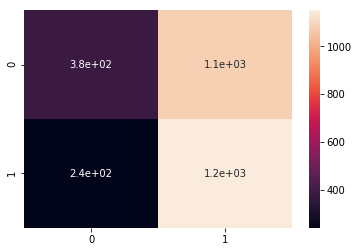

In [237]:
get_performance(X_test,Y_test)

Accuracy score = 0.5267543859649123
[[1389 4444]
 [ 951 4616]]


(0.5267543859649123, array([[1389, 4444],
        [ 951, 4616]]))

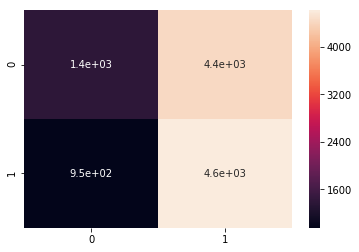

In [238]:
get_performance(X_train,Y_train)

### i) 3 hidden layer

In [300]:
#hyperparameters
epoch = 10
learning_rate = 0.01

In [301]:
%%capture
weight_layers,bias_layers = init_weights(3,[100,50,50])
hidden_layer_activation = relu
cost,acc_train,acc_test = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=hidden_layer_activation)

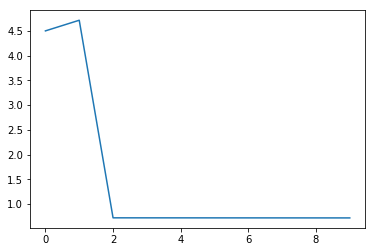

In [302]:
plt.plot(range(len(cost)),cost)

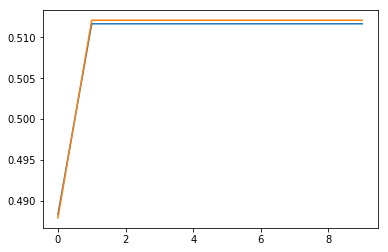

In [303]:
plt.plot(range(len(acc_train)),acc_train)
plt.plot(range(len(acc_test)),acc_test)

Accuracy score = 0.512101017186952
[[1460    0]
 [1391    0]]


(0.512101017186952, array([[1460,    0],
        [1391,    0]]))

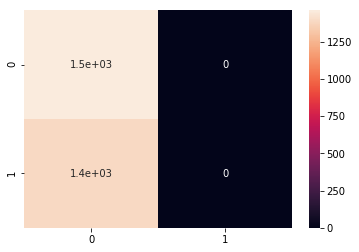

In [304]:
get_performance(X_test,Y_test)

Accuracy score = 0.5116666666666667
[[5833    0]
 [5567    0]]


(0.5116666666666667, array([[5833,    0],
        [5567,    0]]))

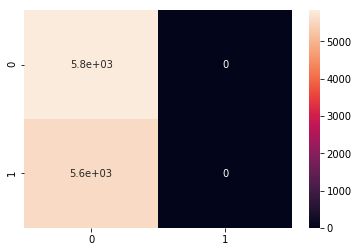

In [305]:
get_performance(X_train,Y_train)

## Part 1 (i)(d)

In [329]:
data = h5py.File('data/Q1/MNIST_Subset.h5','r+')
X=data['X'][:]
Y=data['Y'][:]

In [330]:
X = X.reshape(X.shape[0],-1)

In [331]:
X=X/255

In [332]:
#as we only have 2 classes
Y = np.where(Y==7,0,1)

In [333]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

### i) 1 hidden layer

In [337]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(100,))

In [338]:
clf.fit(X_train,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [339]:
pred = clf.predict(X_test)

In [340]:
accuracy_score(Y_test,pred)

0.9898281304805332

### ii) 3 hidden layer

In [341]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(100,50,50,))

In [342]:
clf.fit(X_train,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [343]:
pred = clf.predict(X_test)

In [344]:
accuracy_score(Y_test,pred)

0.9898281304805332

Accuracy is a lot better in this case compared to my model. Learning is actually happening in this case. Reasons in this case would be several, sklearn uses things like regularization, momentum and maybe a sigmoid for binary problems.